***Introduction***

*This Exploratory Data Analysis (EDA) examines crime incident reports in the city of Boston from June 2015 to October 2018.*

In [ ]:
# Load Necessery libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load Boston Crime Dataset 
data = pd.read_csv("crime.csv",encoding = 'latin-1')
data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327815,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
327816,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
327817,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
327818,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


***About Dataset***

*The data is originally provided by Boston's open data hub*

In [14]:
print(len(data))

37544


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 9632 to 327799
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Group        37544 non-null  object        
 1   Description  37544 non-null  object        
 2   District     37413 non-null  object        
 3   Area         37544 non-null  object        
 4   Shooting     37544 non-null  object        
 5   Date         37544 non-null  datetime64[ns]
 6   Year         37544 non-null  int64         
 7   Month        37544 non-null  int64         
 8   Day          37544 non-null  category      
 9   Hour         37544 non-null  int64         
 10  Street       36526 non-null  object        
 11  Lat          35727 non-null  object        
 12  Long         35727 non-null  object        
 13  Day_of_year  37544 non-null  int32         
dtypes: category(1), datetime64[ns](1), int32(1), int64(3), object(8)
memory usage: 4.9+ MB


In [16]:
data.describe()

,Date,Year,Month,Hour,Day_of_year
count,37544,37544.000000,37544.000000,37544.000000,37544.000000
mean,2016-12-30 22:50:40.244592896,2016.487987,6.630913,13.415006,186.773492
min,2016-01-01 00:00:00,2016.000000,1.000000,0.000000,1.000000
25%,2016-07-02 19:30:00,2016.000000,4.000000,9.000000,101.000000
50%,2016-12-22 08:15:00,2016.000000,7.000000,14.000000,190.000000
75%,2017-07-06 12:22:30,2017.000000,9.000000,18.000000,274.000000
max,2017-12-31 22:50:00,2017.000000,12.000000,23.000000,366.000000
std,NaN,0.499862,3.379323,6.311842,103.150188


*Initially, let's streamline and simplify this dataset. I'll concentrate on the two years with comprehensive data (2016 and 2017). Furthermore, I'll zero in on UCR Part One offenses, encompassing solely the gravest crimes*

In [3]:

# Keep only data from complete years (2016, 2017)
data = data.loc[data['YEAR'].isin([2016,2017])]

# Keep only data on UCR Part One offenses
data = data.loc[data['UCR_PART'] == 'Part One']

# Remove unused columns
data = data.drop(['INCIDENT_NUMBER','OFFENSE_CODE','UCR_PART','Location'], axis=1)

# Convert OCCURED_ON_DATE to datetime
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])

# Fill in nans in SHOOTING column
data.SHOOTING.fillna('N', inplace=True)

# Convert DAY_OF_WEEK to an ordered category
data.DAY_OF_WEEK = pd.Categorical(data.DAY_OF_WEEK, 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)

# Replace -1 values in Lat/Long with Nan
data.Lat.replace(-1, None, inplace=True)
data.Long.replace(-1, None, inplace=True)

# Rename columns to something easier to type (the all-caps are annoying!)
rename = {'OFFENSE_CODE_GROUP':'Group',
         'OFFENSE_DESCRIPTION':'Description',
         'DISTRICT':'District',
         'REPORTING_AREA':'Area',
         'SHOOTING':'Shooting',
         'OCCURRED_ON_DATE':'Date',
         'YEAR':'Year',
         'MONTH':'Month',
         'DAY_OF_WEEK':'Day',
         'HOUR':'Hour',
         'STREET':'Street'}
data.rename(index=str, columns=rename, inplace=True)

# Check
data.head()

,Group,Description,District,Area,Shooting,Date,Year,Month,Day,Hour,Street,Lat,Long
9632,Larceny,LARCENY ALL OTHERS,D14,774,N,2017-06-27 07:00:00,2017,6,Tuesday,7,COMMONWEALTH AVE,42.338482,-71.15289
10406,Larceny,LARCENY ALL OTHERS,D14,791,N,2017-11-10 16:30:00,2017,11,Friday,16,CAROL AVE,42.34498,-71.140906
14183,Larceny,LARCENY THEFT FROM BUILDING,E5,729,N,2017-10-23 13:58:00,2017,10,Monday,13,VFW PKWY,42.28537,-71.17244
14470,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,E18,544,N,2017-03-22 09:00:00,2017,3,Wednesday,9,AUSTIN ST,42.257688,-71.126418
15500,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D14,774,N,2017-03-23 12:00:00,2017,3,Thursday,12,COMMONWEALTH AVE,42.338363,-71.15441


***Tpyes of Violations***

*Let's begin by examining the occurrence of various crime categories. As we've narrowed down our focus to only 'severe' offenses, we now have just 9 distinct types of violations – significantly more manageable compared to the initial 67*

In [4]:
# A few more data checks
data.dtypes
data.isnull().sum()
data.shape

(37544, 13)

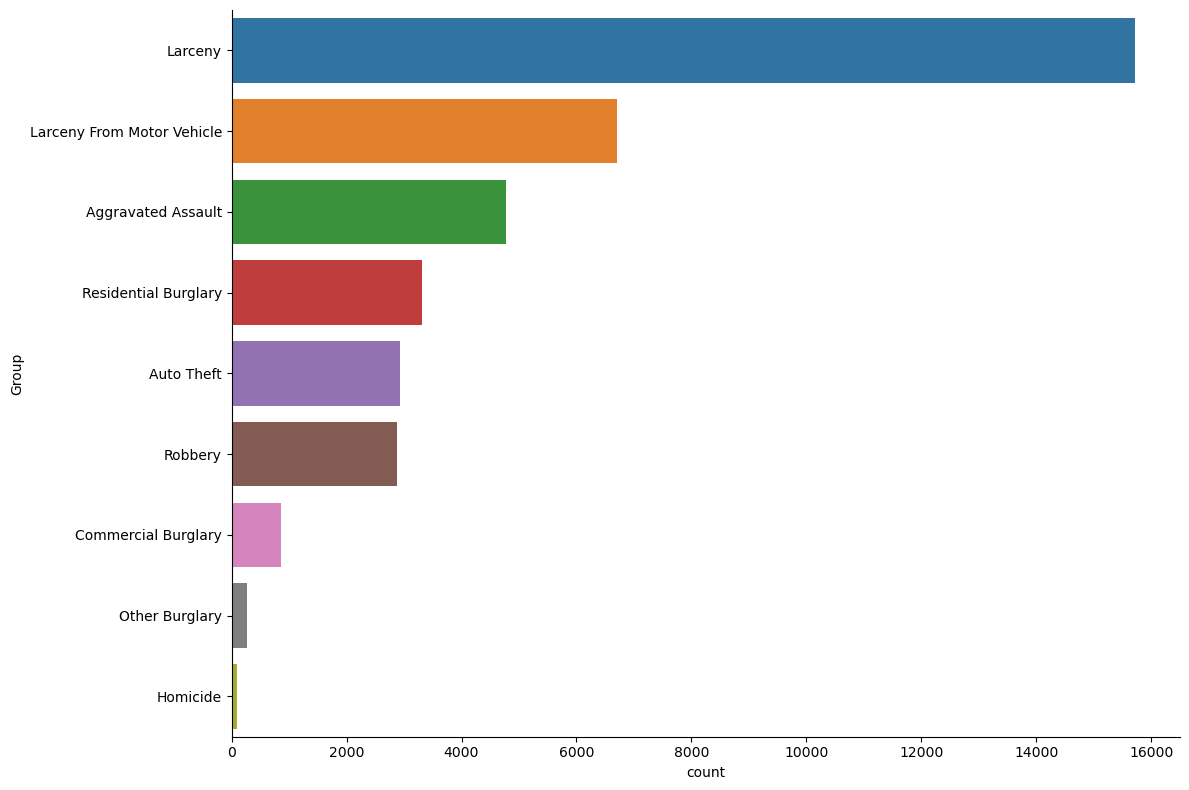

In [5]:
# Countplot for crime types
sns.catplot(y='Group',
           kind='count',
            height=8, 
            aspect=1.5,
            order=data.Group.value_counts().index,
           data=data);

***Timing Patterns of Major Offenses***

*We can examine trends across multiple timeframes, including daily hours, weekdays, and months throughout the year*

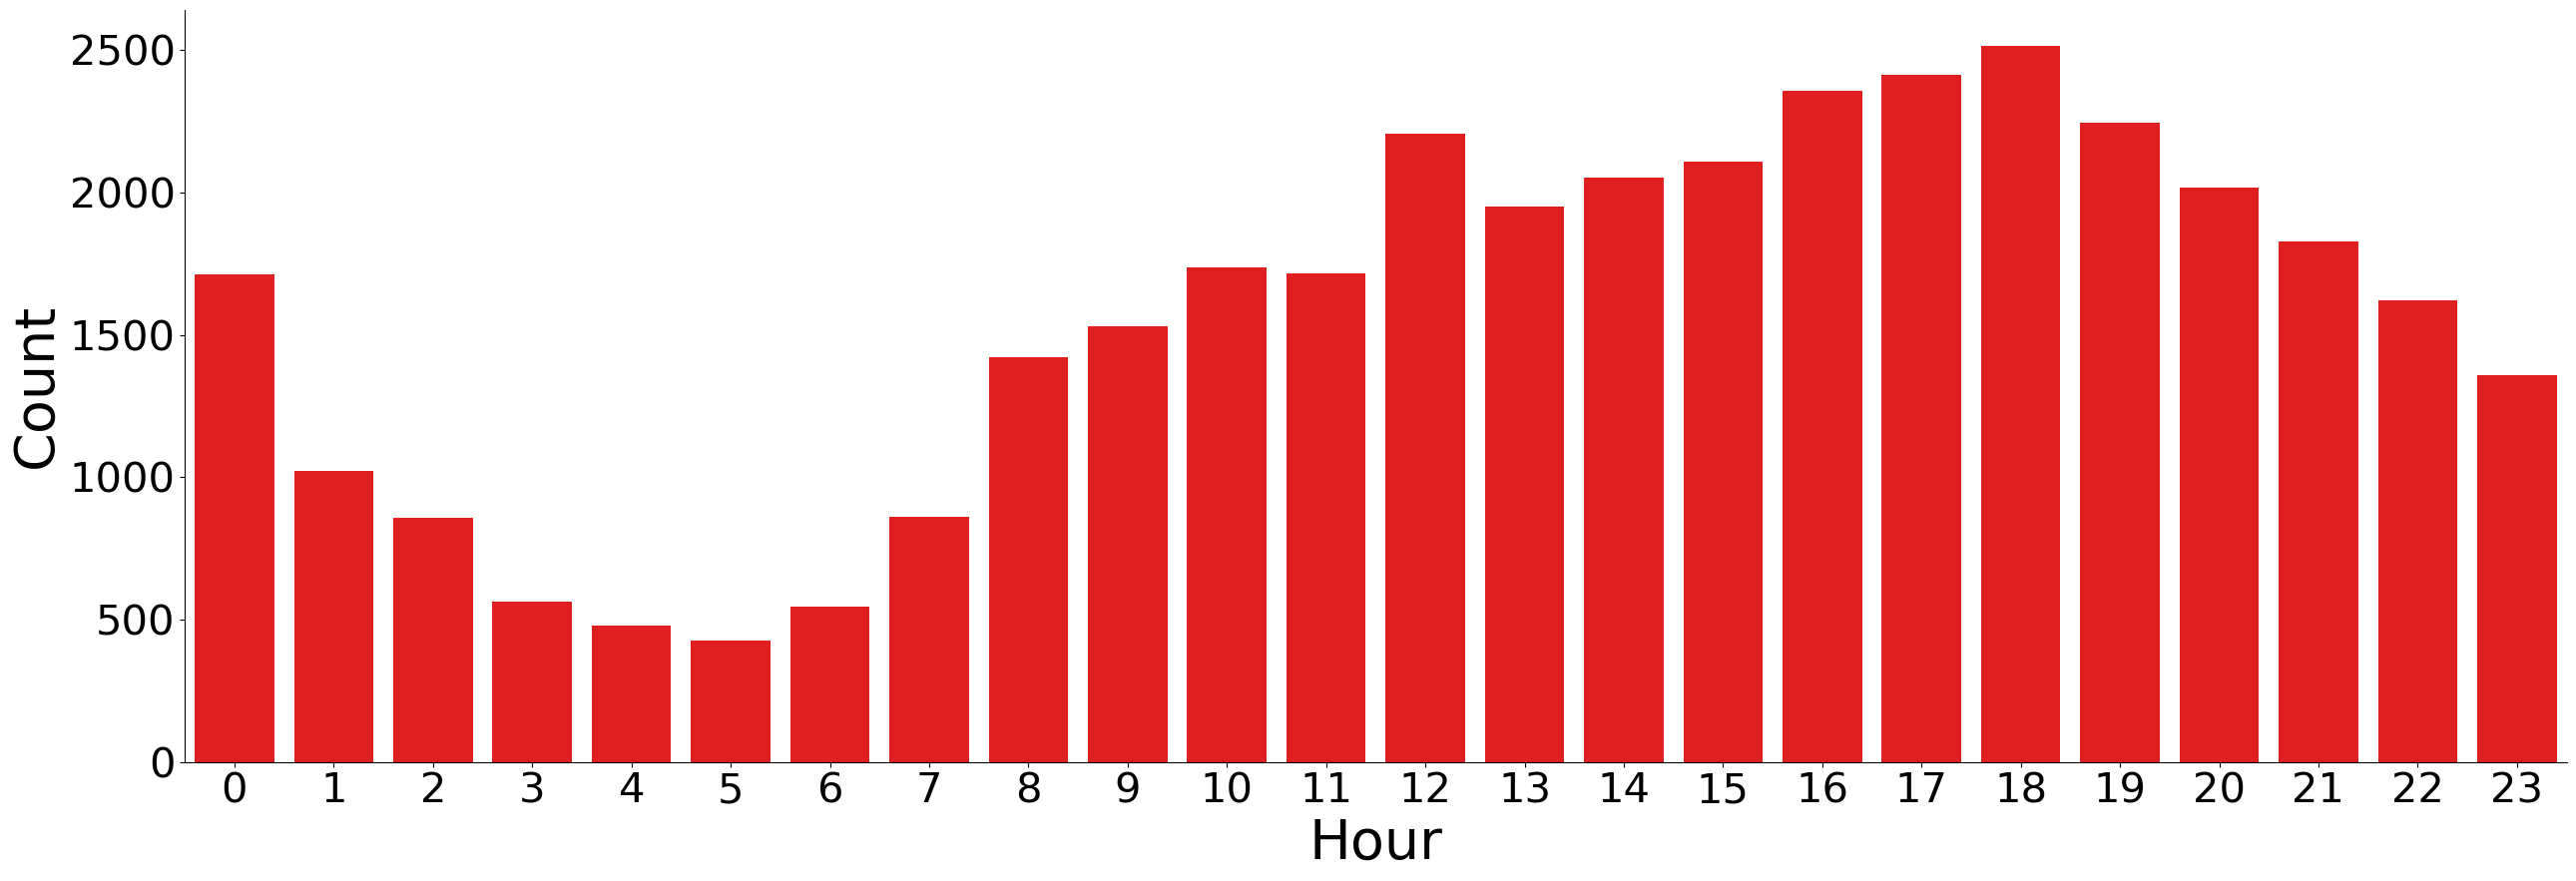

In [17]:
# Crimes by hour of the day
sns.catplot(x='Hour',
           kind='count',
            height=8.27, 
            aspect=3,
            color='red',
           data=data)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Hour', fontsize=40)
plt.ylabel('Count', fontsize=40)
plt.show()

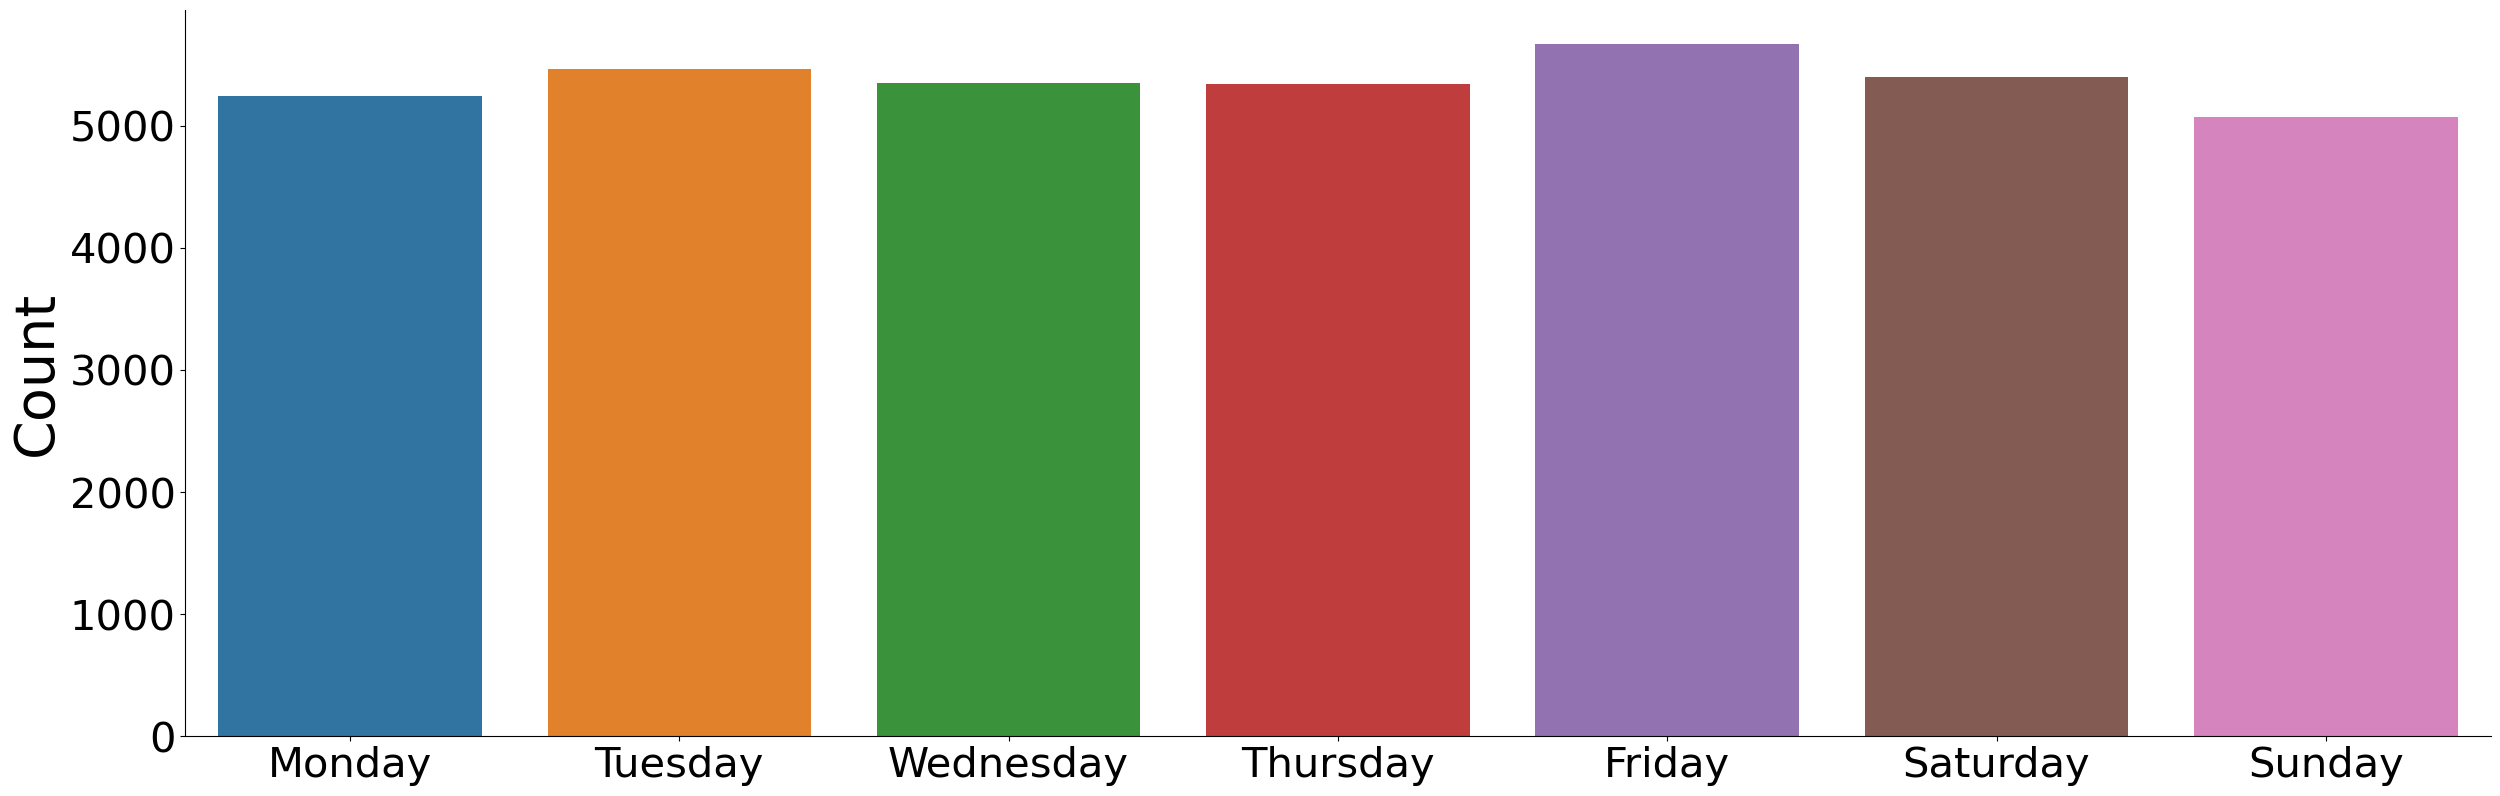

In [7]:
# Crimes by day of the week
sns.catplot(x='Day',
           kind='count',
            height=8, 
            aspect=3,
           data=data)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40);

In [ ]:
# Crimes by month of year
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.catplot(x='Month',
           kind='count',
            height=8, 
            aspect=3,
            color='blue',
           data=data)
plt.xticks(np.arange(12), months, size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40);

*Crime rates exhibit a dip between 1-8 in the morning, gradually escalating throughout the day, reaching a peak around 6 pm. There is variability across weekdays, with Friday recording the highest crime rate and Sunday the lowest. Additionally, months appear to play a role, as the winter period from February to April reports lower crime rates, while the summer and early fall months from June to October exhibit the highest rates. Notably, there is a spike in crime rates in January.

Are there any other time-related factors correlated with crime? According to crime analysts, certain offenses tend to surge during holidays, especially larceny and robbery. This can be attributed to various factors: crowded shopping centers provide more opportunities for thieves, travelers' homes become more susceptible to burglary, and heightened alcohol and drug consumption can elevate the likelihood of conflict-related crime. Let's investigate if our data supports these findings, focusing on the year 2017. I've also included a couple of non-official holidays known for rowdiness in Boston: St. Patrick's Day and the Boston Marathon*

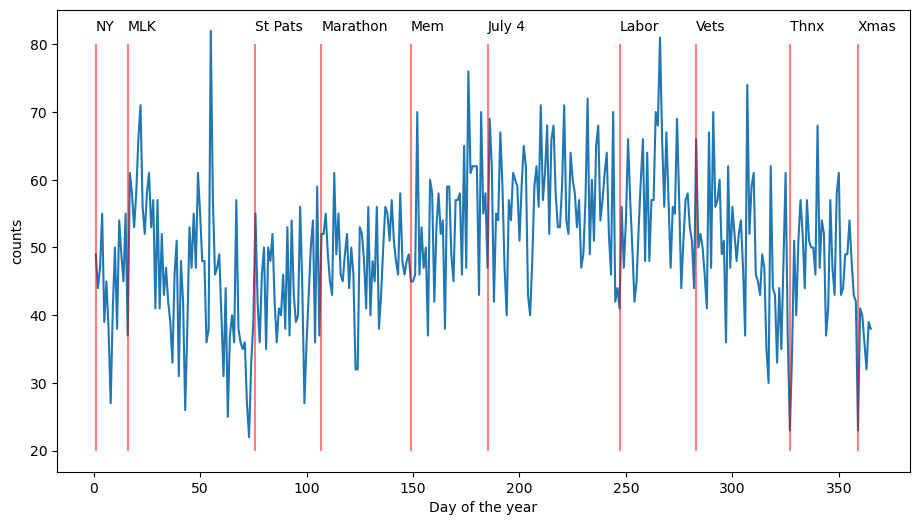

In [9]:
# Create data for plotting
data['Day_of_year'] = data.Date.dt.dayofyear
data_holidays = data[data.Year == 2017].groupby(['Day_of_year']).size().reset_index(name='counts')

# Dates of major U.S. holidays in 2017
holidays = pd.Series(['2017-01-01', # New Years Day
                     '2017-01-16', # MLK Day
                     '2017-03-17', # St. Patrick's Day
                     '2017-04-17', # Boston marathon
                     '2017-05-29', # Memorial Day
                     '2017-07-04', # Independence Day
                     '2017-09-04', # Labor Day
                     '2017-10-10', # Veterans Day
                     '2017-11-23', # Thanksgiving
                     '2017-12-25']) # Christmas
holidays = pd.to_datetime(holidays).dt.dayofyear
holidays_names = ['NY',
                 'MLK',
                 'St Pats',
                 'Marathon',
                 'Mem',
                 'July 4',
                 'Labor',
                 'Vets',
                 'Thnx',
                 'Xmas']

import datetime as dt
# Plot crimes and holidays
fig, ax = plt.subplots(figsize=(11,6))
sns.lineplot(x='Day_of_year',
            y='counts',
            ax=ax,
            data=data_holidays)
plt.xlabel('Day of the year')
plt.vlines(holidays, 20, 80, alpha=0.5, color ='r')
for i in range(len(holidays)):
    plt.text(x=holidays[i], y=82, s=holidays_names[i])

***Locations of Major Offenses***

*We can utilize the latitude and longitude columns to visualize the crime locations in Boston. When we set the alpha parameter to a very small value, we can identify certain areas with a high frequency of crimes, often referred to as 'hotspots*

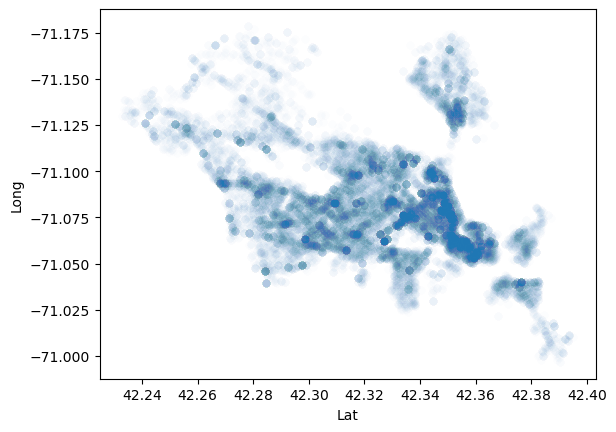

In [10]:
# Simple scatterplot
sns.scatterplot(x='Lat',
               y='Long',
                alpha=0.01,
               data=data);

*That indeed resembles Boston. If you have any familiarity with the city, it won't be too unexpected to observe that the downtown area exhibits the most concentrated points of darkness. However, there are also certain areas beyond the city center with notably elevated crime rates. Let's create an additional scatterplot, but now we'll assign colors to points based on districts to identify which districts experience the highest crime rates*

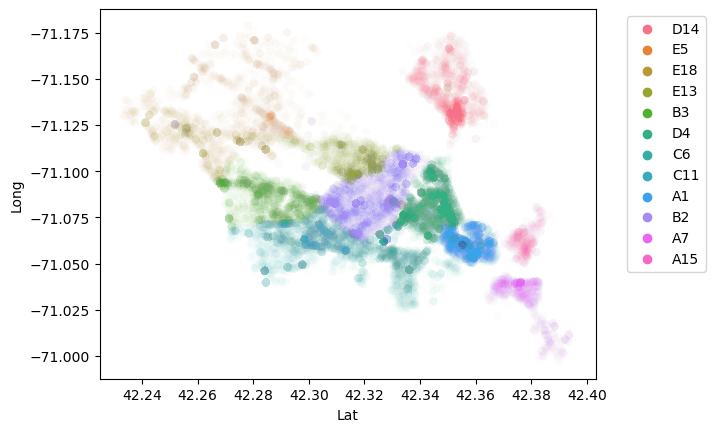

In [11]:
# Plot districts
sns.scatterplot(x='Lat',
               y='Long',
                hue='District',
                alpha=0.01,
               data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

*We can now link elevated crime rates to specific districts, notably A1 and D4, which align with the bustling areas of downtown Boston. Another region with significantly high crime rates is evident in district D14.*

*To enhance visual appeal, let's utilize Folium to generate an interactive heatmap illustrating Boston's crime distribution. For this visualization, I'll focus exclusively on the data from 2017*

***Key Findings***

***1-Larceny stands out as the predominant type of severe crime.***

***2-Serious offenses are more prone to happen during the afternoon and evening.***

***3-Fridays witness the highest likelihood of serious crimes, while Sundays experience the lowest.***

***4-The summer and early fall months record the highest incidence of serious crimes, contrasting with lower rates during winter (excluding January, which resembles summer rates).***

***5-There is no evident correlation between major holidays and crime rates.***

***6-City center regions, particularly districts A1 and D4, exhibit the highest occurrence of serious crimes***

***Conclusion***

*This exploratory data analysis provides only a preliminary examination of the dataset. Additional analyses could delve into the temporal and spatial variations of different crime types. I didn't delve into the less severe UCR Part Two and Part Three crimes, which are more prevalent than Part One crimes but encompass intriguing categories like drug-related offenses. Another intriguing avenue would be to integrate this data with other Boston-related information, such as demographics or even weather data, to explore the factors that predict crime rates over time and in different locations.*